In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to check homogeneity of a region
def is_homogeneous(region, threshold=10):
    """Check if a region is homogeneous based on pixel intensity variance."""
    return np.std(region) < threshold


In [3]:
# Recursive splitting function
def split(image, min_size, threshold):
    h, w = image.shape
    if h <= min_size or w <= min_size or is_homogeneous(image, threshold):
        mean_val = np.mean(image)
        return np.full_like(image, mean_val)
    else:
        mid_h, mid_w = h // 2, w // 2
        top_left = split(image[:mid_h, :mid_w], min_size, threshold)
        top_right = split(image[:mid_h, mid_w:], min_size, threshold)
        bottom_left = split(image[mid_h:, :mid_w], min_size, threshold)
        bottom_right = split(image[mid_h:, mid_w:], min_size, threshold)
        return np.vstack((np.hstack((top_left, top_right)), np.hstack((bottom_left, bottom_right))))

In [4]:
# Merge operation (basic smoothing of split result)
def merge(image, merge_threshold=15):
    merged = cv2.medianBlur(image.astype(np.uint8), 3)
    return merged

(-0.5, 255.5, 255.5, -0.5)

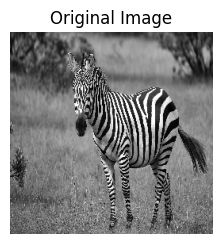

In [12]:
# Load grayscale image
img = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

# Try different minimum quad-tree dimensions
min_sizes = [64, 32, 16]

plt.figure(figsize=(12, 4))
plt.subplot(1, len(min_sizes) + 1, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

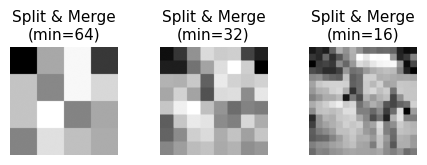

In [14]:
# Apply Split and Merge for different min sizes
for i, min_size in enumerate(min_sizes, start=2):
    split_result = split(img, min_size=min_size, threshold=10)
    merged_result = merge(split_result, merge_threshold=15)
    plt.subplot(1, len(min_sizes) + 1, i)
    plt.imshow(merged_result, cmap='gray')
    plt.title(f"Split & Merge\n(min={min_size})", fontsize=11)
    plt.axis("off")

plt.tight_layout(pad=3.0)
plt.show()